Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [65]:
# uncomment the code below and execute this cell
library('tidyverse')

If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [66]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

In [67]:
options(repr.plot.width = 8)

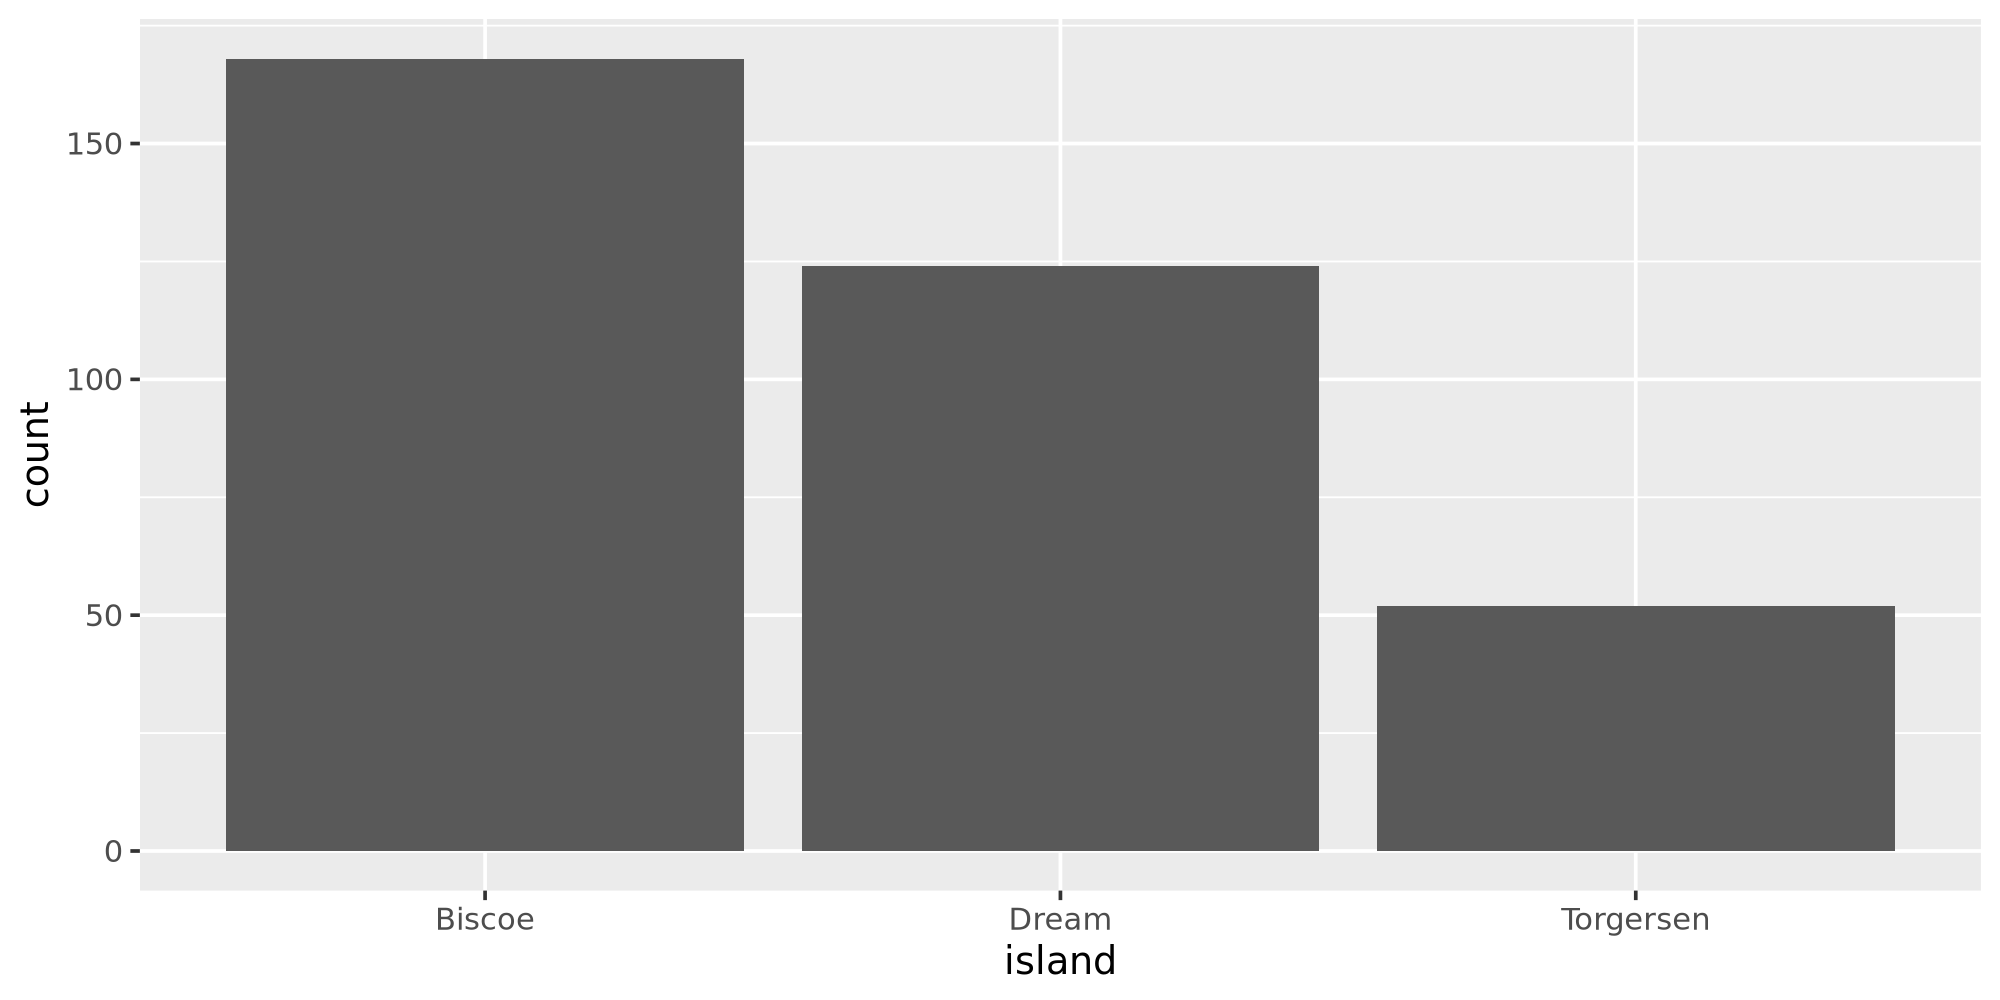

In [68]:
ggplot(data= penguins) +
    geom_bar(mapping = aes(x = island))

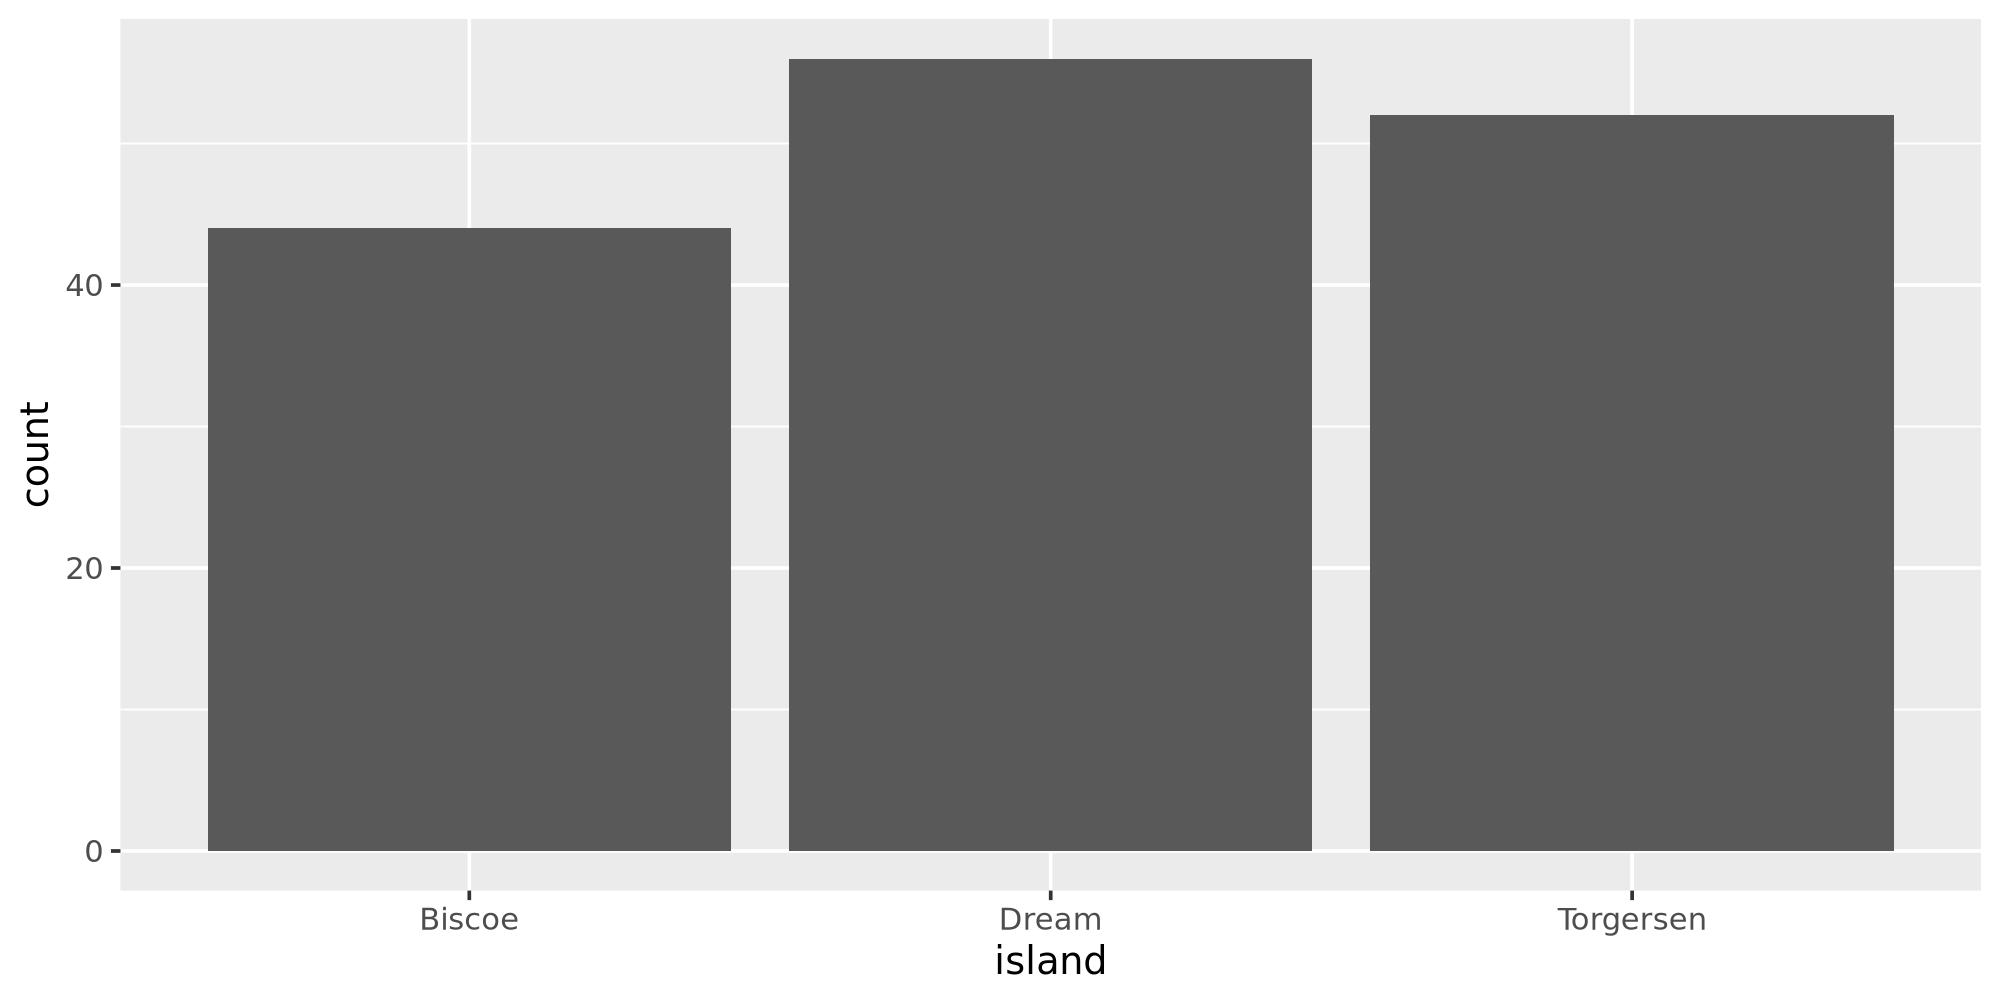

In [69]:
ggplot(data = penguins|> 
    filter(species == "Adelie")) + 
    geom_bar(mapping = aes(x = island))

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

### The Adelie penguins were found on the Biscoe, Dream and Torgersen islands.

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


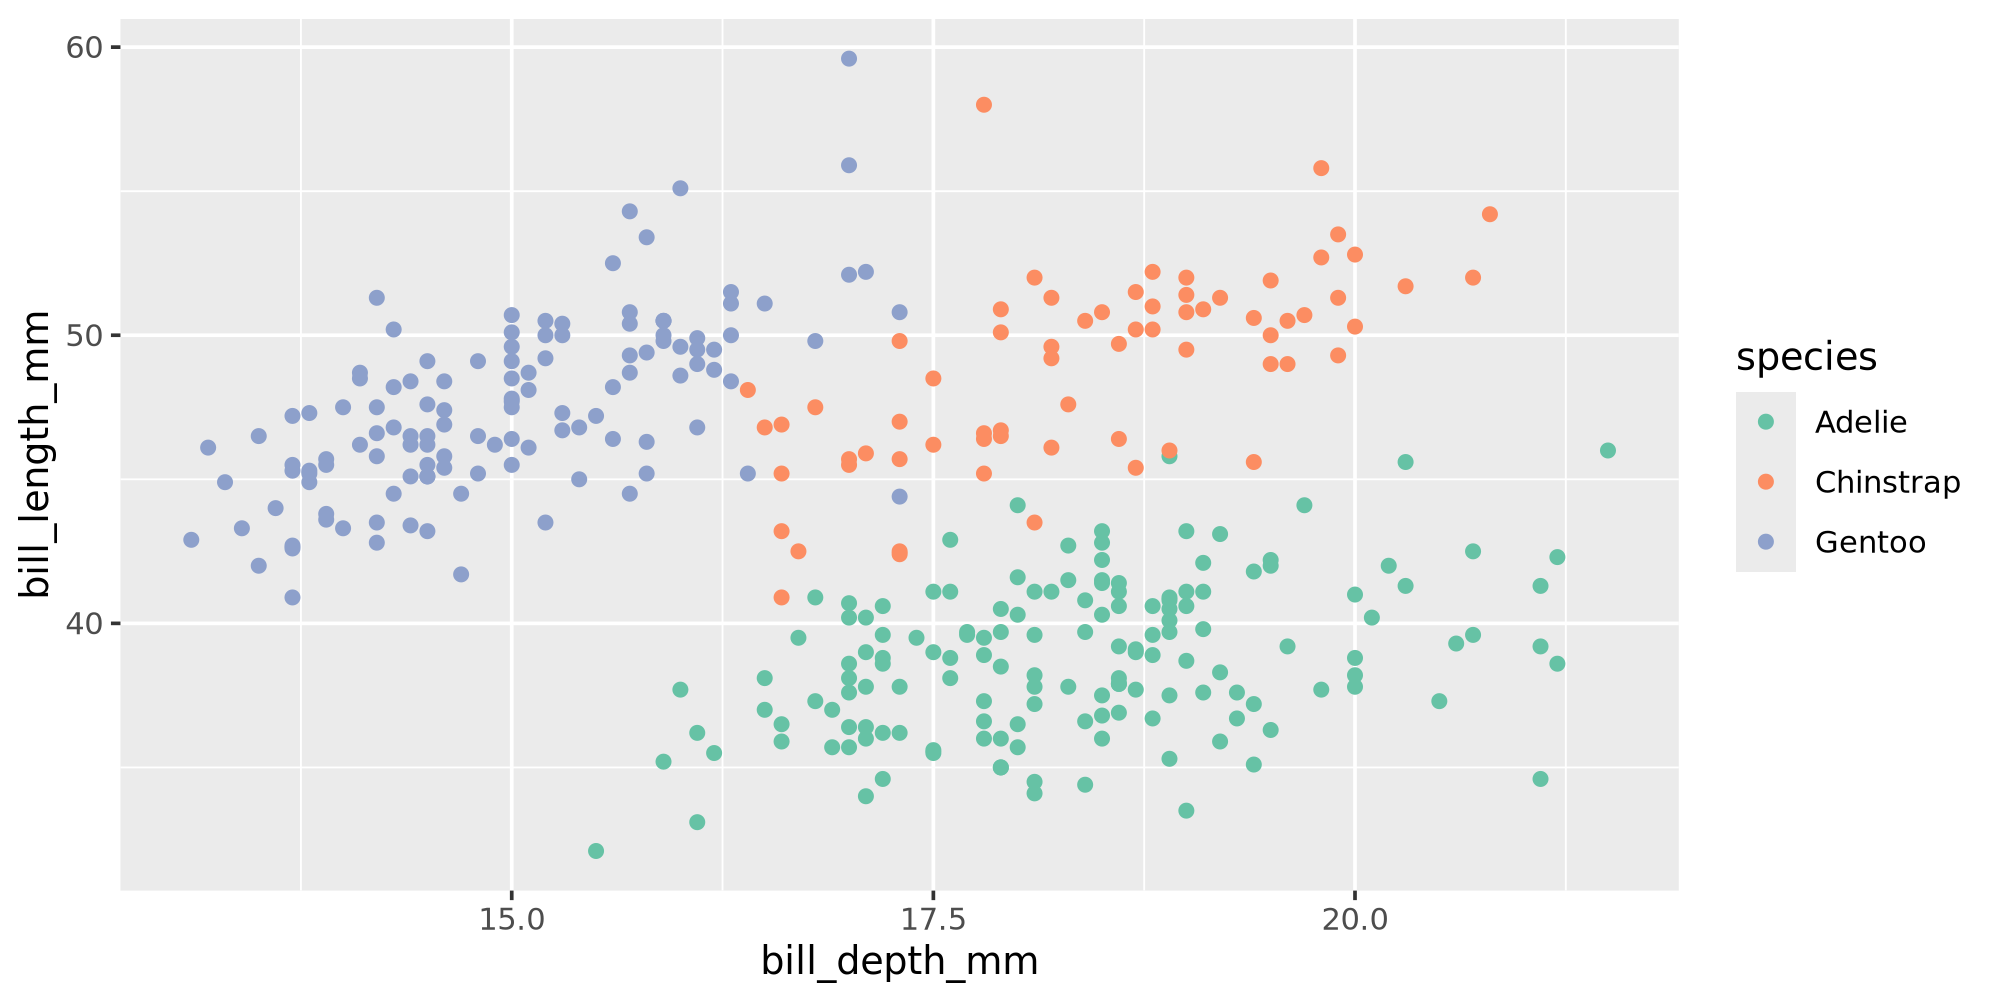

In [70]:
ggplot(data = penguins) +
    geom_point(mapping = aes(x = bill_depth_mm, y = bill_length_mm, color = species)) +
    scale_color_brewer(palette = "Set2")
    

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


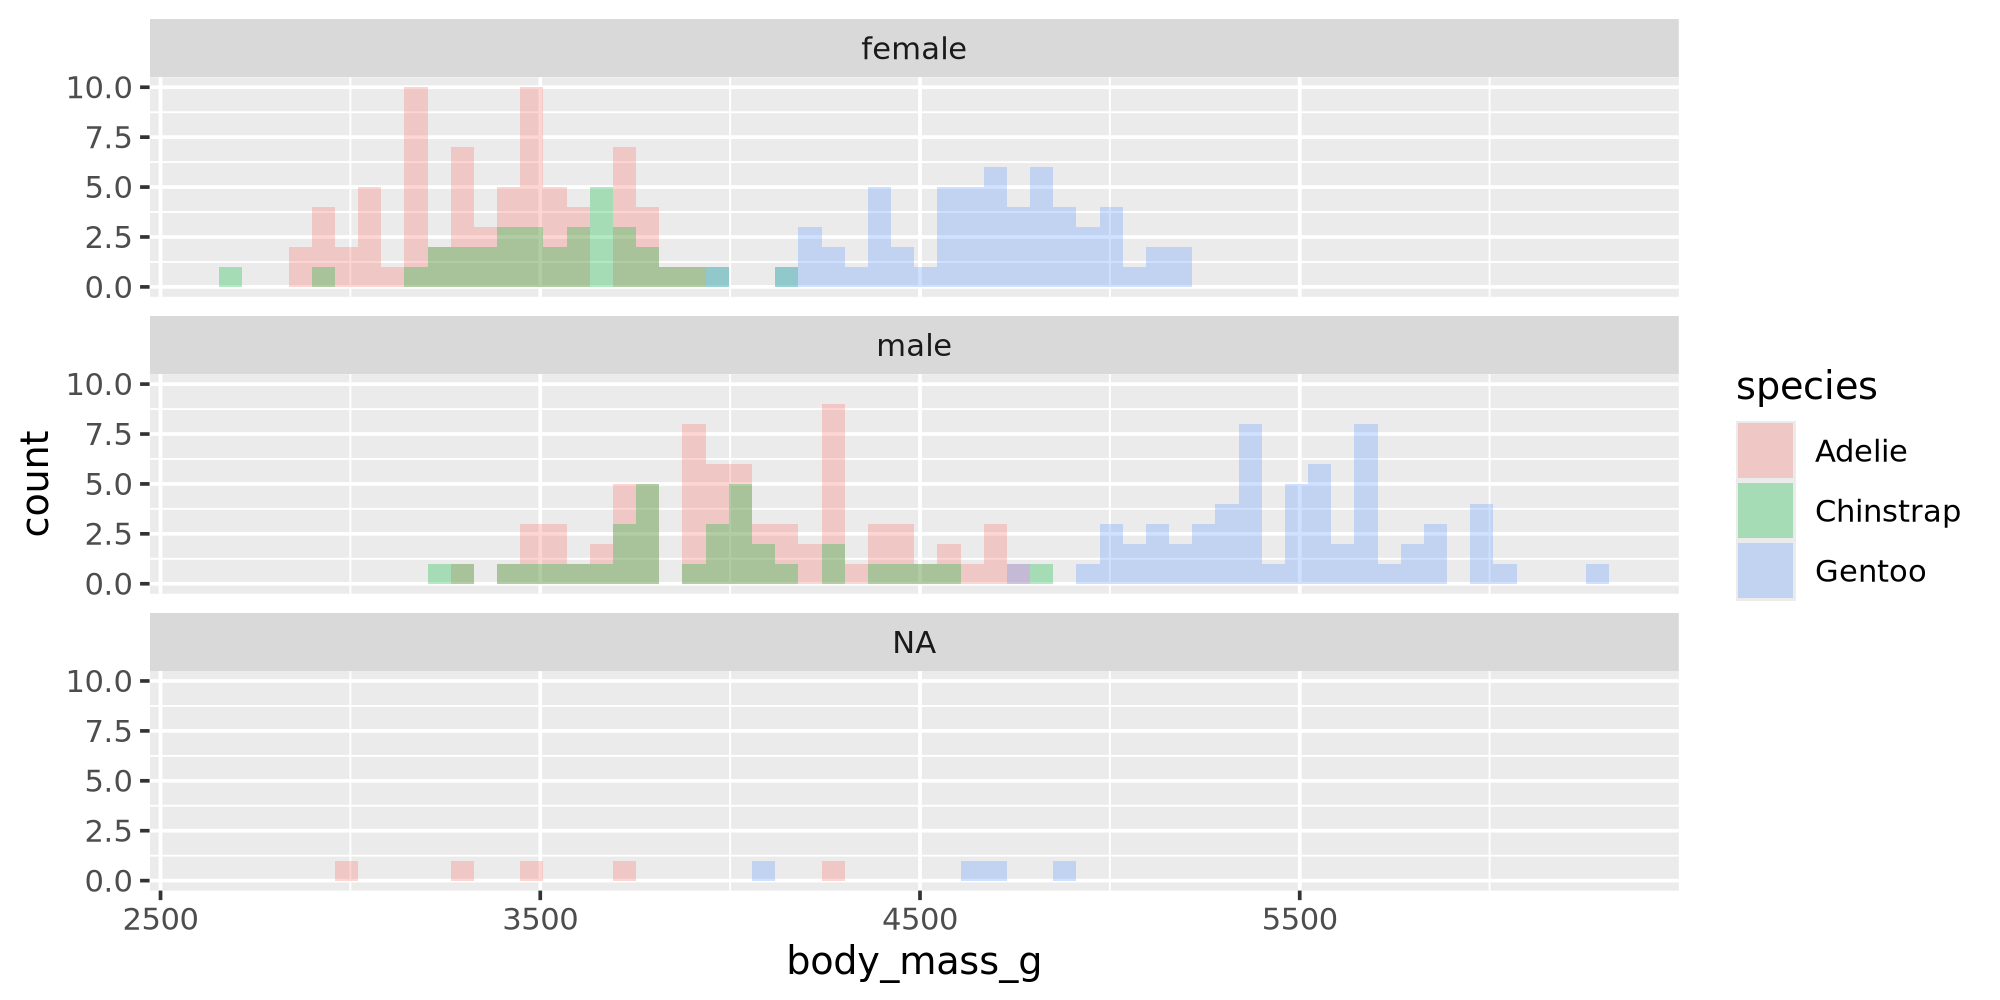

In [71]:
data = penguins
mapping = aes(x = body_mass_g, fill = species)
StatBin = stat_bin(binwidth = 50, bins = 20)
geom_1 = geom_histogram(position = "identity", alpha = 0.3, bins = 60)


 ggplot(data = penguins, mapping = aes(x = body_mass_g, fill = species)) + 
    geom_histogram(position = "identity", alpha =0.3, bins = 60) +
    facet_wrap(~sex , ncol = 1) +
    scale_color_brewer(palette = "Set2")
# """

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


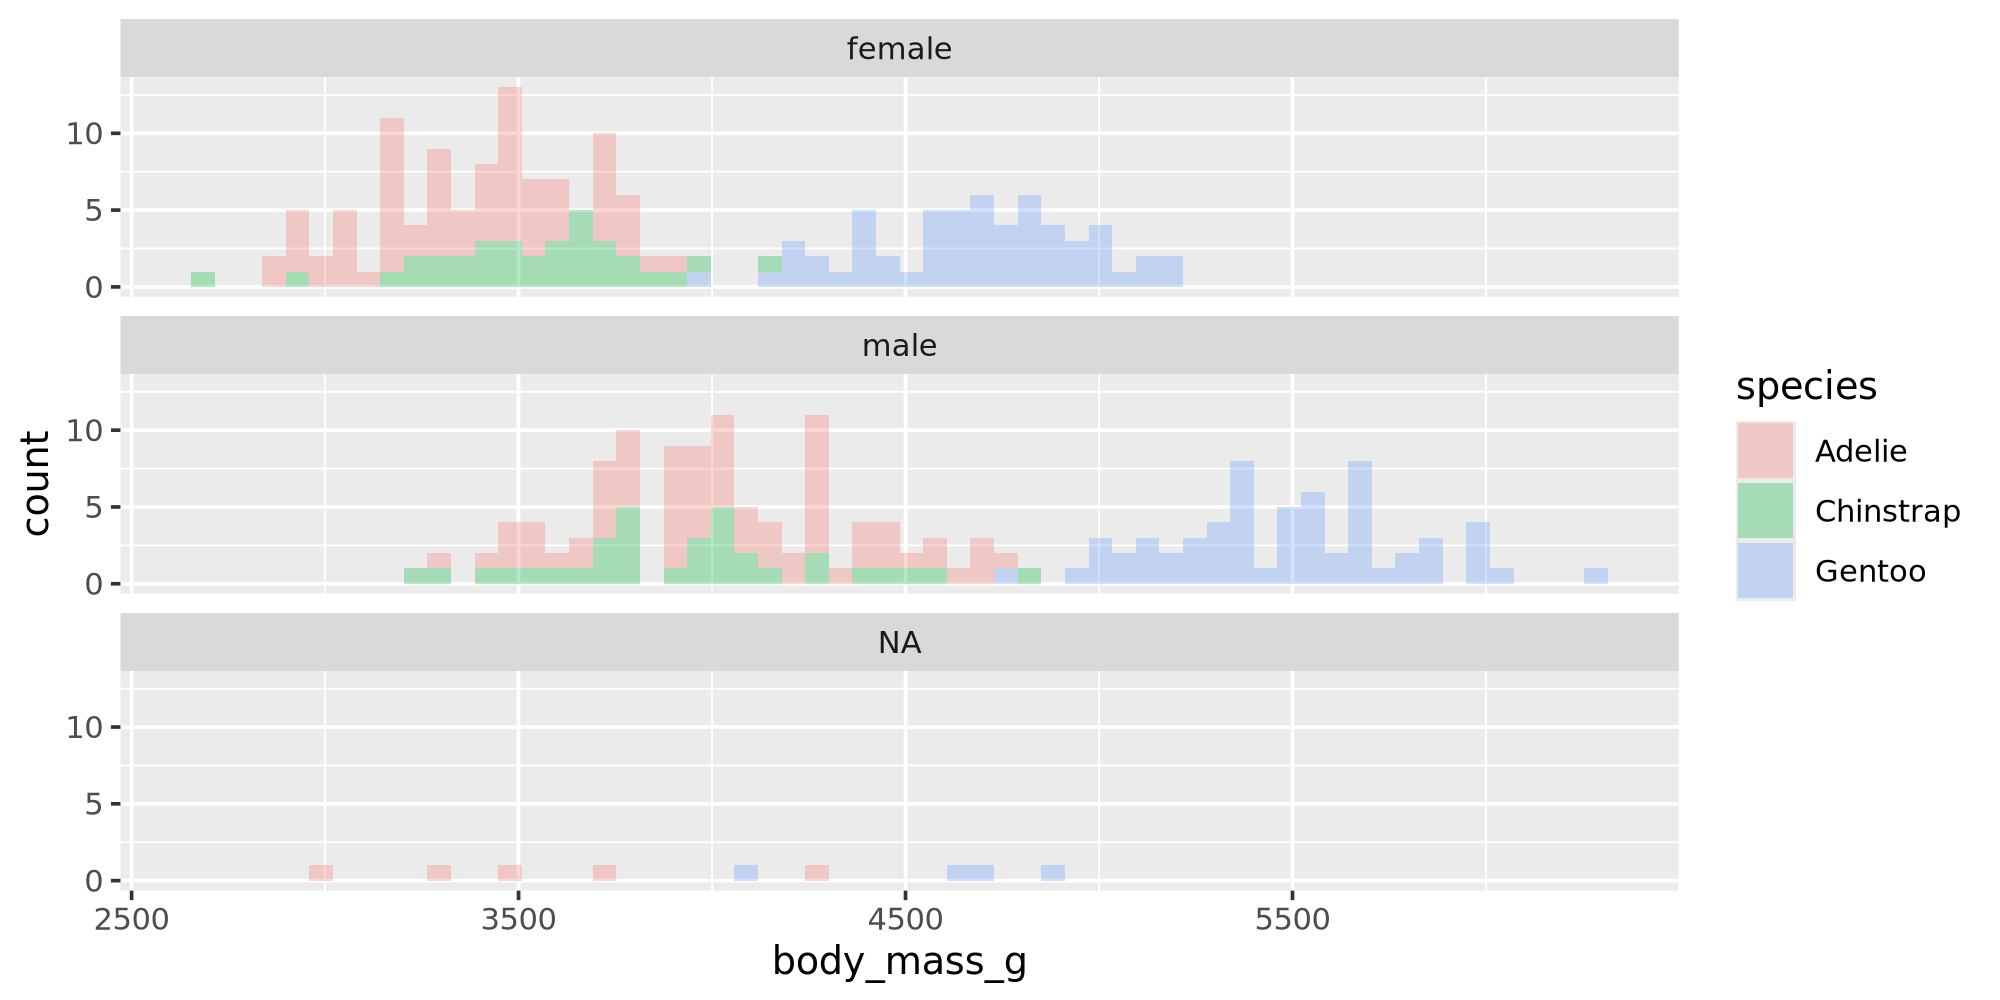

In [72]:
 ggplot(data = penguins, mapping = aes(x = body_mass_g, fill = species)) + 
    geom_histogram(alpha =0.3, bins = 60) +
    facet_wrap(~sex , ncol = 1) +
    scale_color_brewer(palette = "Set2")

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

## The identity argument allows you see when multiple species data overlaps the counts with other. Without the "identity" argument, the data would show the max count for all species in the order describe (alphabethically in our example). If there are equal counts, only the last "species data would be shown. However, if the position is set to "identity", all similar counts will be shown as a combination of the color palette chosen. 

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [73]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [74]:
txhousing_clean <- txhousing %>% select(-inventory)

In [75]:
txhousing_clean |> head()

city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene,2000,1,72,5380000,71400,701,2000.000
Abilene,2000,2,98,6505000,58700,746,2000.083
Abilene,2000,3,130,9285000,58100,784,2000.167
Abilene,2000,4,98,9730000,68600,785,2000.250
Abilene,2000,5,141,10590000,67300,794,2000.333
Abilene,2000,6,156,13910000,66900,780,2000.417


In [76]:
txhousing_clean -> txhousing

In [77]:
glimpse(txhousing)

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [78]:
dallas_sub <- txhousing %>% filter(city == "Dallas")

In [79]:
glimpse(dallas_sub)

Rows: 187
Columns: 8
$ city     <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 2286, 3247, 4244, 3977, 4545, 4738, 4276, 4373, 3654, 3601, 3…
$ volume   <dbl> 375389865, 555124812, 702148377, 667331427, 783197806, 846254…
$ median   <dbl> 124400, 127700, 128500, 132000, 137100, 138800, 139600, 13450…
$ listings <dbl> 13316, 13495, 13752, 13752, 14018, 14392, 14705, 14607, 15109…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


In [80]:
dallas_sub |> head()

city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2000,1,2286,375389865,124400,13316,2000.000
Dallas,2000,2,3247,555124812,127700,13495,2000.083
Dallas,2000,3,4244,702148377,128500,13752,2000.167
Dallas,2000,4,3977,667331427,132000,13752,2000.250
Dallas,2000,5,4545,783197806,137100,14018,2000.333
Dallas,2000,6,4738,846254912,138800,14392,2000.417


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [81]:
dallas_sub <- dallas_sub %>% 
    mutate(prct_sold = (sales/listings * 100))

In [82]:
dallas_sub|> head()

city,year,month,sales,volume,median,listings,date,prct_sold
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2000,1,2286,375389865,124400,13316,2000.000,17.16732
Dallas,2000,2,3247,555124812,127700,13495,2000.083,24.06076
Dallas,2000,3,4244,702148377,128500,13752,2000.167,30.86097
Dallas,2000,4,3977,667331427,132000,13752,2000.250,28.91943
Dallas,2000,5,4545,783197806,137100,14018,2000.333,32.42260
Dallas,2000,6,4738,846254912,138800,14392,2000.417,32.92107


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [83]:
dallas_summary <- dallas_sub %>%
    group_by(month) %>%
    summarise(avg_pct_listing = mean(prct_sold, na.rm = TRUE))

In [84]:
glimpse(dallas_summary)

Rows: 12
Columns: 2
$ month           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
$ avg_pct_listing <dbl> 15.98050, 19.14604, 24.82399, 24.61666, 26.66821, 27.4…


In [85]:
dallas_summary |> head(12)

month,avg_pct_listing
<int>,<dbl>
1,15.98050
2,19.14604
3,24.82399
4,24.61666
5,26.66821
6,27.41067
7,25.98095
8,24.41879
9,20.44251


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [86]:
top_n = 3
top_months <- dallas_summary %>%
    slice_max(order_by = avg_pct_listing, n=top_n)

In [87]:
glimpse(top_months)

Rows: 3
Columns: 2
$ month           <int> 6, 5, 7
$ avg_pct_listing <dbl> 27.41067, 26.66821, 25.98095


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [88]:
 txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") |>
   mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


#### This data block takes the txhousing data which is already sliced with only Dallas data and further slices the data for all sales betwen 2012 and 2013. The slice is then grouped by month and the mean of the (2) data points per month (mean_prct+sold) is then sorted by the max values. Only the top 3 values are shown.